In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [2]:
df=pd.read_csv('PORT_Demand_Dataset.csv')

In [3]:
df.head(3)

,Port Botany Full,Port Botany Empty,Flinders Port Full,Flinders Port Empty,Port of Melbourne Full,Port of Melbourne Empty,Port of Brisbane Full,Port of Brisbane Empty,Fremental Port Full,Fremental Port Empty
0,20364.46700,224.872695,2159.209858,679.699992,18957.30319,208.777130,7929.905128,758.401041,6123.804905,206.330665
1,20425.17879,225.543099,2165.647025,681.726354,19013.81985,209.399549,7953.546242,760.662033,6142.061563,206.945790
2,20425.17879,225.543099,2165.647025,681.726354,19013.81985,209.399549,7953.546242,760.662033,6142.061563,206.945790


In [4]:
df["Port Botany Import"]=df["Port Botany Full"]+df["Port Botany Empty"]
df["Flinders Port Import"]=df["Flinders Port Full"]+df["Flinders Port Empty"]
df["Port of Melbourne Import"]=df["Port of Melbourne Full"]+df["Port of Melbourne Empty"]
df["Port of Brisbane Import"]=df["Port of Brisbane Full"]+df["Port of Brisbane Empty"]
df["Fremental Port Import"]=df["Fremental Port Full"]+df["Fremental Port Empty"]

In [5]:
df["Total import Demand"]=df["Port Botany Import"]+df["Flinders Port Import"]+df["Port of Melbourne Import"]+df["Port of Brisbane Import"]+df["Fremental Port Import"]

In [6]:
df.drop(["Port Botany Full","Port Botany Empty","Flinders Port Empty","Flinders Port Full","Port of Melbourne Full","Port of Melbourne Empty","Port of Brisbane Empty","Port of Brisbane Full","Fremental Port Full","Fremental Port Empty"],axis=1)

,Port Botany Import,Flinders Port Import,Port of Melbourne Import,Port of Brisbane Import,Fremental Port Import,Total import Demand
0,20589.339695,2838.909850,19166.080320,8688.306169,6330.135570,57612.771604
1,20650.721889,2847.373380,19223.219399,8714.208275,6349.007353,57784.530296
2,20650.721889,2847.373380,19223.219399,8714.208275,6349.007353,57784.530296
3,20067.591100,2766.969844,18680.398138,8468.138274,6169.725405,56152.822761
4,20036.900008,2762.738078,18651.828589,8455.187222,6160.289512,56066.943409
...,...,...,...,...,...,...
144,14635.267446,2017.947419,13623.589463,6175.801958,4499.572515,40952.178800
145,19760.680159,2724.652192,18394.702733,8338.627748,6075.366485,55294.029318
146,20834.868451,2872.763971,19394.636646,8791.914590,6405.622705,58299.806364
147,23167.391598,3194.378119,21565.921720,9776.194590,7122.750499,64826.636526


## Get Supply and Demand Dataset

In [8]:
dett = pd.read_csv('Demand11.csv')
sup =  pd.read_csv('Supply11.csv')

In [9]:
sup

,Price,Supply
0,311.538462,60965.66524
1,294.230769,55386.26609
2,300.000000,55386.26609
3,313.461538,55987.12446
4,307.692308,57446.35193
...,...,...
145,725.000000,39077.25322
146,736.538462,35472.10300
147,728.846154,35901.28755
148,721.153846,36502.14592


In [10]:
dett

,Price,Demand
0,563.265306,60528.25553
1,496.474954,57690.41769
2,366.604824,57862.40786
3,338.775510,57862.40786
4,533.580705,56228.50123
...,...,...
144,854.545455,39201.47420
145,1142.115028,41007.37101
146,1045.640074,55368.55037
147,921.335807,58378.37838


In [11]:
A = sup.drop([0])
B = dett.sort_values('Price')

In [12]:
A.sort_values('Price')
A['Demand'] = B['Demand']

In [13]:
A = A.fillna(47891.7)

In [14]:
A.describe()

,Price,Supply,Demand
count,149.000000,149.000000,149.000000
mean,648.193082,46562.923063,45524.164733
std,309.616210,6602.684298,7905.356660
min,263.461538,26974.248930,30687.960690
25%,375.000000,42167.381970,39803.439800
50%,605.769231,46459.227470,44275.184280
75%,813.461538,51351.931330,53046.683050
max,1394.230769,60708.154510,64914.004910


## Graph of Demand and Supply V/S price

Text(0.5, 0, 'Price')

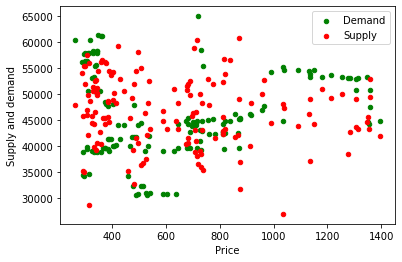

In [15]:
Ax = A.plot(kind='scatter', x='Price',y='Demand',color = 'g',label ='Demand')
ax2 = A.plot(kind='scatter', x='Price', y='Supply', color='r', label ='Supply', ax= Ax)
ax2.set_ylabel('Supply and demand')
ax2.set_xlabel('Price')

## Test Train Validation  Split 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = A.iloc[:,0].values
X = A.iloc[:,1:3].values
X

array([[55386.26609, 57690.41769],
       [55386.26609, 57862.40786],
       [55987.12446, 57862.40786],
       [57446.35193, 56228.50123],
       [54098.71245, 56142.50614],
       [51952.7897 , 56314.49631],
       [47832.61803, 60356.26536],
       [48605.15021, 60442.26044],
       [49892.70386, 57862.40786],
       [51351.93133, 57776.41278],
       [50579.39914, 58292.38329],
       [51094.4206 , 58206.38821],
       [50236.0515 , 57948.40295],
       [49721.03004, 58206.38821],
       [52553.64807, 55454.54545],
       [52639.48498, 55626.53563],
       [54442.06009, 61302.2113 ],
       [56072.96137, 61216.21622],
       [56587.98283, 61216.21622],
       [56072.96137, 48402.9484 ],
       [55901.28755, 48144.96314],
       [54184.54936, 48058.96806],
       [54356.22318, 41265.35627],
       [53583.69099, 41265.35627],
       [52896.99571, 41265.35627],
       [50150.21459, 40061.42506],
       [48862.66094, 40061.42506],
       [48347.63948, 40147.42015],
       [48690.98712,

In [18]:
y

array([ 294.2307692,  300.       ,  313.4615385,  307.6923077,
        286.5384615,  298.0769231,  263.4615385,  317.3076923,
        311.5384615,  328.8461538,  328.8461538,  344.2307692,
        342.3076923,  344.2307692,  338.4615385,  340.3846154,
        348.0769231,  359.6153846,  361.5384615,  375.       ,
        376.9230769,  401.9230769,  390.3846154,  396.1538462,
        428.8461538,  405.7692308,  403.8461538,  413.4615385,
        384.6153846,  384.6153846,  444.2307692,  475.       ,
        482.6923077,  536.5384615,  490.3846154,  507.6923077,
        496.1538462,  421.1538462,  705.7692308,  717.3076923,
        871.1538462,  815.3846154,  838.4615385,  755.7692308,
        775.       ,  813.4615385,  821.1538462,  873.0769231,
        917.3076923,  957.6923077,  965.3846154, 1359.615385 ,
       1359.615385 , 1305.769231 , 1255.769231 , 1213.461538 ,
       1178.846154 , 1136.538462 , 1130.769231 , 1151.923077 ,
       1090.384615 , 1038.461538 , 1034.615385 ,  990.3

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.66, random_state=1) 

In [20]:
X_train.shape

(104, 2)

In [21]:
X_test.shape

(15, 2)

In [22]:
X_val.shape

(30, 2)

## Random Forest Regressor (RFR)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
reg = RandomForestRegressor()

In [25]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred = reg.predict(X_test)
y_pred

array([ 529.90384614,  508.17307699, 1051.00000021,  779.21153847,
        578.61538459,  773.55769231,  974.01923075,  506.13461539,
        447.93974359,  312.75      ,  913.63461527,  838.23076925,
        567.23076922,  319.07692309,  320.90384617])

## Finding RMSE error for RFR

In [27]:
from sklearn.metrics import mean_squared_error
RMSE_RFR = mean_squared_error(y_test, y_pred)
RMSE_RFR

23413.845352233762

## Finding R2 accuracy for RFR

In [28]:
from sklearn.metrics import r2_score
R2_RFR = r2_score(y_test,y_pred)
R2_RFR

0.754253625286456

## Accuracy for train test and Validation Dataset for RFR

In [29]:
y_pred1 = reg.predict(X_train)
Acc_rfr_train = (abs(y_train - y_pred1)/y_train)*100
Acc_rfr_train=100-Acc_rfr_train.mean()
Acc_rfr_train

90.13437402701531

In [30]:
y_pred2 = reg.predict(X_val)
Acc_rfr_val = (abs(y_val - y_pred2)/y_val)*100
Acc_rfr_val=100-Acc_rfr_val.mean()
Acc_rfr_val

71.41574942102474

In [31]:
y_pred3 = reg.predict(X_test)
Acc_rfr_test = (abs(y_test - y_pred3)/y_test)*100
Acc_rfr_test=100-Acc_rfr_test.mean()
Acc_rfr_test

80.23892190028552

## Support Vector Regression(SVR)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [33]:
reg = SVR(kernel= 'rbf')

In [34]:
reg.fit(X_train,y_train)

SVR()

## Accuracy for train test and Validation Dataset for SVR

In [35]:
y_pred1 = reg.predict(X_test)
Acc_svr_test = (abs(y_test - y_pred1)/y_test)*100
Acc_svr_test=100-Acc_svr_test.mean()
Acc_svr_test

56.169206546743766

In [36]:
y_pred2 = reg.predict(X_train)
Acc_svr_train = (abs(y_train - y_pred2)/y_train)*100
Acc_svr_train=100-Acc_svr_train.mean()
Acc_svr_train

57.664626968622954

In [37]:
y_pred3 = reg.predict(X_val)
Acc_svr_val = (abs(y_val - y_pred3)/y_val)*100
Acc_svr_val=100-Acc_svr_val.mean()
Acc_svr_val

54.83818290265688

## Finding RMSE error for SVR

In [38]:
from sklearn.metrics import mean_squared_error
RMSE_SVR= mean_squared_error(y_test, y_pred)
RMSE_SVR

23413.845352233762

## Finding R2 accuracy for SVR

In [39]:
from sklearn.metrics import r2_score
R2_SVR= r2_score(y_test,y_pred)
R2_SVR

0.754253625286456

## Gradient Boost Regressor(GBR)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
reg = GradientBoostingRegressor()

In [42]:
reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [43]:
y_pred = reg.predict(X_test)
y_pred

array([ 513.94295787,  345.1119392 , 1165.01236124,  769.30949035,
        529.28000487,  829.09042862,  937.96532932,  489.14711992,
        405.02060819,  298.69629705,  830.51578437,  864.69683609,
        550.33750903,  321.22889965,  309.59296956])

## Finding RMSE error for GBR

In [44]:
from sklearn.metrics import mean_squared_error
RMSE_GBR= mean_squared_error(y_test, y_pred)
RMSE_GBR

19955.568221493504

## Finding R2 accuracy for GBR

In [45]:
from sklearn.metrics import r2_score
R2_GBR = r2_score(y_test,y_pred)
R2_GBR

0.7905509124193061

## Accuracy for train test and Validation Dataset for GBR

In [46]:
y_pred = reg.predict(X_test)
y_pred
Acc_gbr_test = (abs(y_test - y_pred)/y_test)*100
Acc_gbr_test=100-Acc_gbr_test.mean()
Acc_gbr_test

83.86254005848129

In [47]:
y_pred1 = reg.predict(X_train)
Acc_gbr_train = (abs(y_train - y_pred1)/y_train)*100
Acc_gbr_train=100-Acc_gbr_train.mean()
Acc_gbr_train

92.18399101704802

In [48]:
y_pred2 = reg.predict(X_val)
Acc_gbr_val = (abs(y_val - y_pred2)/y_val)*100
Acc_gbr_val=100-Acc_gbr_val.mean()
Acc_gbr_val

72.54135055770853

In [49]:
data=[[R2_RFR,RMSE_RFR],[R2_SVR,RMSE_SVR],[R2_GBR,RMSE_GBR]]
df = pd.DataFrame(data,columns=['R2','RMSE'],index=['RFR','SVR','GBR'])
df

,R2,RMSE
RFR,0.754254,23413.845352
SVR,0.754254,23413.845352
GBR,0.790551,19955.568221


## Bar Plot of R2 accuracy of different Algorithm

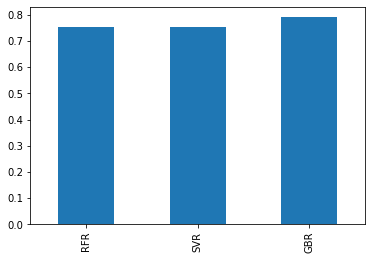

In [50]:
df['R2'].plot(kind='bar')

## Bar Plot of RMSE Error of different Algorithm

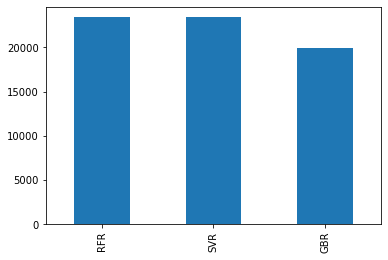

In [51]:
df['RMSE'].plot(kind='bar')

In [52]:
data =[[Acc_rfr_train,Acc_rfr_test,Acc_rfr_val],[Acc_svr_train,Acc_svr_test,Acc_svr_val],[Acc_gbr_train,Acc_gbr_test,Acc_gbr_val]]

In [53]:
data

[[90.13437402701531, 80.23892190028552, 71.41574942102474],
 [57.664626968622954, 56.169206546743766, 54.83818290265688],
 [92.18399101704802, 83.86254005848129, 72.54135055770853]]

In [54]:
df=pd.DataFrame(data,columns=['Train','Test','Val'],index=['RFR','SVR','GBR'])
df

,Train,Test,Val
RFR,90.134374,80.238922,71.415749
SVR,57.664627,56.169207,54.838183
GBR,92.183991,83.862540,72.541351


## Bar Plot percentage accuracy of different Algorithm in train, test and validate dataset

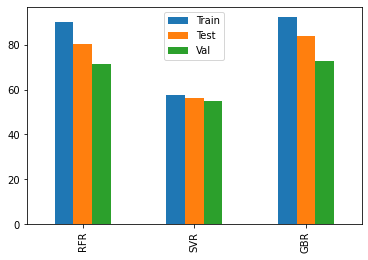

In [55]:
df.plot(kind='bar')